In [98]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression 
data = pd.read_csv('cs-training.csv')
for column in list(data.columns[data.isnull().sum()>0]):
    mean_val=data[column].mean()
    data[column].fillna(mean_val,inplace=True)
data




,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [99]:
from sklearn.model_selection import train_test_split
X,y=data.iloc[:,2:].values,data.iloc[:,1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train_norm=mms.fit_transform(X_train)
X_test_norm=mms.transform(X_test)

lr=LogisticRegression(penalty='l1',C=0.1,solver='liblinear',multi_class='ovr')
lr.fit(X_train_norm,y_train)
lr.coef_


array([[  0.        ,  -3.33639405,  17.49214365,   0.        ,
          0.        ,  -0.0208259 ,   0.        ,   0.        ,
        -14.21844231,   1.24041732]])

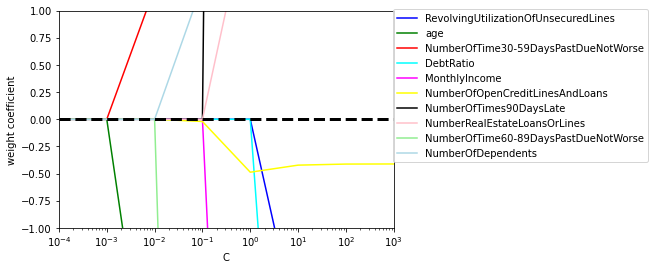

In [100]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue']

weights, params = [], []
for c in np.arange(-4., 4.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_norm, y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=data.columns[column + 2],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-4), 10**3])
plt.ylim([-1,1])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()


In [ ]:
# Therefore, I think the most important features are "Number Of Time 30-59 Days Past Due Not Worse(which is red)" and "age(which is green)".

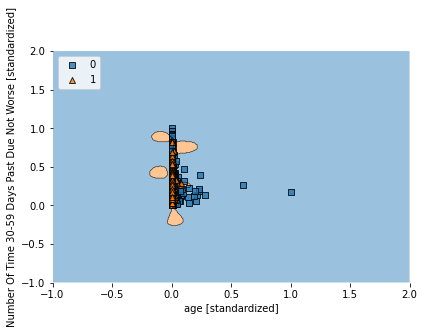

In [115]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
svm = SVC(kernel='rbf', C=1000, random_state=1)

X_selected=X_train_norm[:,[4,5]]
svm.fit(X_selected, y_train)
plot_decision_regions(X_selected, 
                      y_train,
                      clf=svm)
plt.xlabel('age [standardized]')
plt.ylabel('Number Of Time 30-59 Days Past Due Not Worse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_11.png', dpi=300)
plt.show()

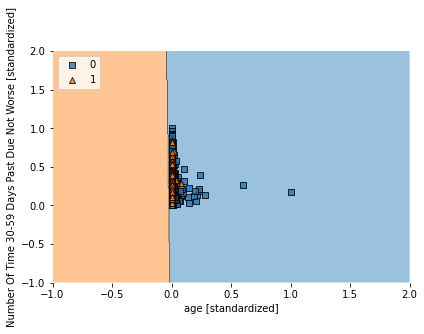

In [112]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=500.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_selected, y_train)

plot_decision_regions(X_selected, y_train,clf=lr)
plt.xlabel('age [standardized]')
plt.ylabel('Number Of Time 30-59 Days Past Due Not Worse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

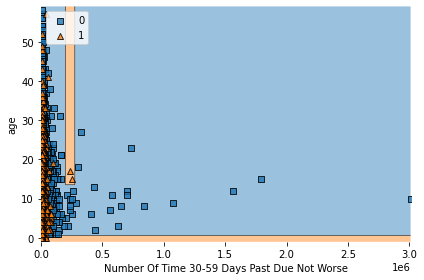

In [126]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=5, 
                                    random_state=1)
X_select=X[:,[4,5]]
tree_model.fit(X_select, y)

plot_decision_regions(X_select, y, 
                      clf=tree_model)

plt.ylabel('age')
plt.xlabel('Number Of Time 30-59 Days Past Due Not Worse')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()